# Finite Difference Methods

## 1 Finite Difference Methods
Finite Difference Methods (FDM) are one of the popular numerical methods used in computational finance. FDM are discretizations used for solving differential equations by approximating them with difference equations. It is one of the simplest and the oldest methods to solve differential equations. These techniques were applied to numerical applications as early as 1950s.

FDM are similar in approach to the (binomial) tress. However, instead of discretising asset prices and the passage of time in a tree structure, it discretises in a **grid** - with time and price steps - by calculating the value at every possible grid points.

**Explicit, Implicit and Crank-Nicolson** are the three popular approaches of FDM. The explicit methods are simple to implement, but it does not always converge and largely depends on the size of the time and asset step. **Explicit methods are unstable when compared to other two methods. Finite Difference approach is peferred for low dimensional problem, usually upto 4 dimensions**.

## 2 Differentiation Using The Grid
The Binomial method contains the diffusion - the volatility - in the tree structure whereas in FDM, the '**tree**' is fixed and we change the parameters to reflect the changing diffusion. We will now define the grid by specifying the time step $\delta t$ and asset step $\delta s$ and discretise $S$ and $t$ as

$$S = i \delta s$$

, and time to maturity as (P.S. time is backward from the maturity to the beginning)

$$t= T -k \delta t$$

where $0\leq i \leq I$, and $0\leq k \leq K$

Here $i$ and $k$ are respective steps in the grid and we can write the value of the option at each grid points as (time is always on the superscript)

$$V_i^k = (i\delta s, T - k\delta t)$$

## 3 Approximating Greeks
The greeks terms, the Black–Scholes equation can be written as,

$$\Theta + \frac{1}{2}\sigma^2 S^2 \Gamma  + rS\Delta - r V = 0$$

Assume that we know the option value at each grid points, we can extract the derivatives of the option using Taylor series expansion.

### Approximating $\Theta$

We know that the first derivative of option as,

by T.S.E.,

$$V(S,t+h) = V(S,t) + h\frac{\partial V}{\partial t} + \frac{1}{2!}h^2 \frac{\partial^2 V}{\partial t^2} + ...$$

$$V(S,t+h) - V(S,t) = h\frac{\partial V}{\partial t} + O(h^2)$$

$$\frac{\partial V}{\partial t} = \frac{V(S,t+h) - V(S,t)}{h} + O(h)$$

$$ \frac{\partial V}{\partial t} = \lim_{h\to 0}  \frac{V(S, t+h) - V(S,t)}{h} $$

We can then approximate the time derivative from the grid using,

$$ \frac{\partial V}{\partial t} (S,t) \approx \frac{ V_i^k - V_i^{k+1} }{\delta t} $$

### Approximating $\Delta$

We know that the central difference has much lower error when compared to forward and backward differences. Accordingly, we can approximate the first derivative of option with respect to the underlying as,

Here, we expand T.D.E. in three and more terms to approximate, because that would reduce the power of error terms.

$$V(S+\delta s,t) = V(S,t) + (\delta s)\frac{\partial V}{\partial S} + \frac{1}{2!}(\delta s)^2 \frac{\partial^2 V}{\partial S^2} + \frac{1}{3!}(\delta s)^3 \frac{\partial^3 V}{\partial S^3}...$$

, and

$$V(S-\delta s,t) = V(S,t) - (\delta s)\frac{\partial V}{\partial S} + \frac{1}{2!}(\delta s)^2 \frac{\partial^2 V}{\partial S^2} - \frac{1}{3!}(\delta s)^3 \frac{\partial^3 V}{\partial S^3}...$$

, and make a difference,

$$V(S+\delta s,t) - V(S-\delta s,t) = 2(\delta s)\frac{\partial V}{\partial S} + O((\delta s)^3)$$

$$\frac{V(S+\delta s,t) - V(S-\delta s,t)}{2(\delta s)} = \frac{\partial V}{\partial S} + O((\delta s)^2)$$

, through this way that expanding in three and more terms and make a difference, we can get the error $O((\delta s)^2)$. If not make a difference, to get $\frac{V(S+\delta s,t) - V(S,t)}{\delta s} = \frac{\partial V}{\partial S} + O(\delta s)$, then there would be an error $ O(is)$.

$$ \frac{\partial V}{\partial S} (S,t) \approx \frac{ V_{i+1}^k - V_{i-1}^{k} }{2\delta s} $$

### Approximating $\Gamma$

The gamma of the option is the second derivative of option with respective to the underlying and approximating it we have,

$$ \frac{\partial^2 V}{\partial S^2} (S,t) \approx \frac{ V_{i+1}^k + V_{i-1}^{k} - 2V_{i}^{k} }{\delta s^2} $$

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))
# Set max row and columns to 300 and 100
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)

**Example**

Suppose that we know the value of the option on the below grid points, we can then easily evaluate the greeks as follows

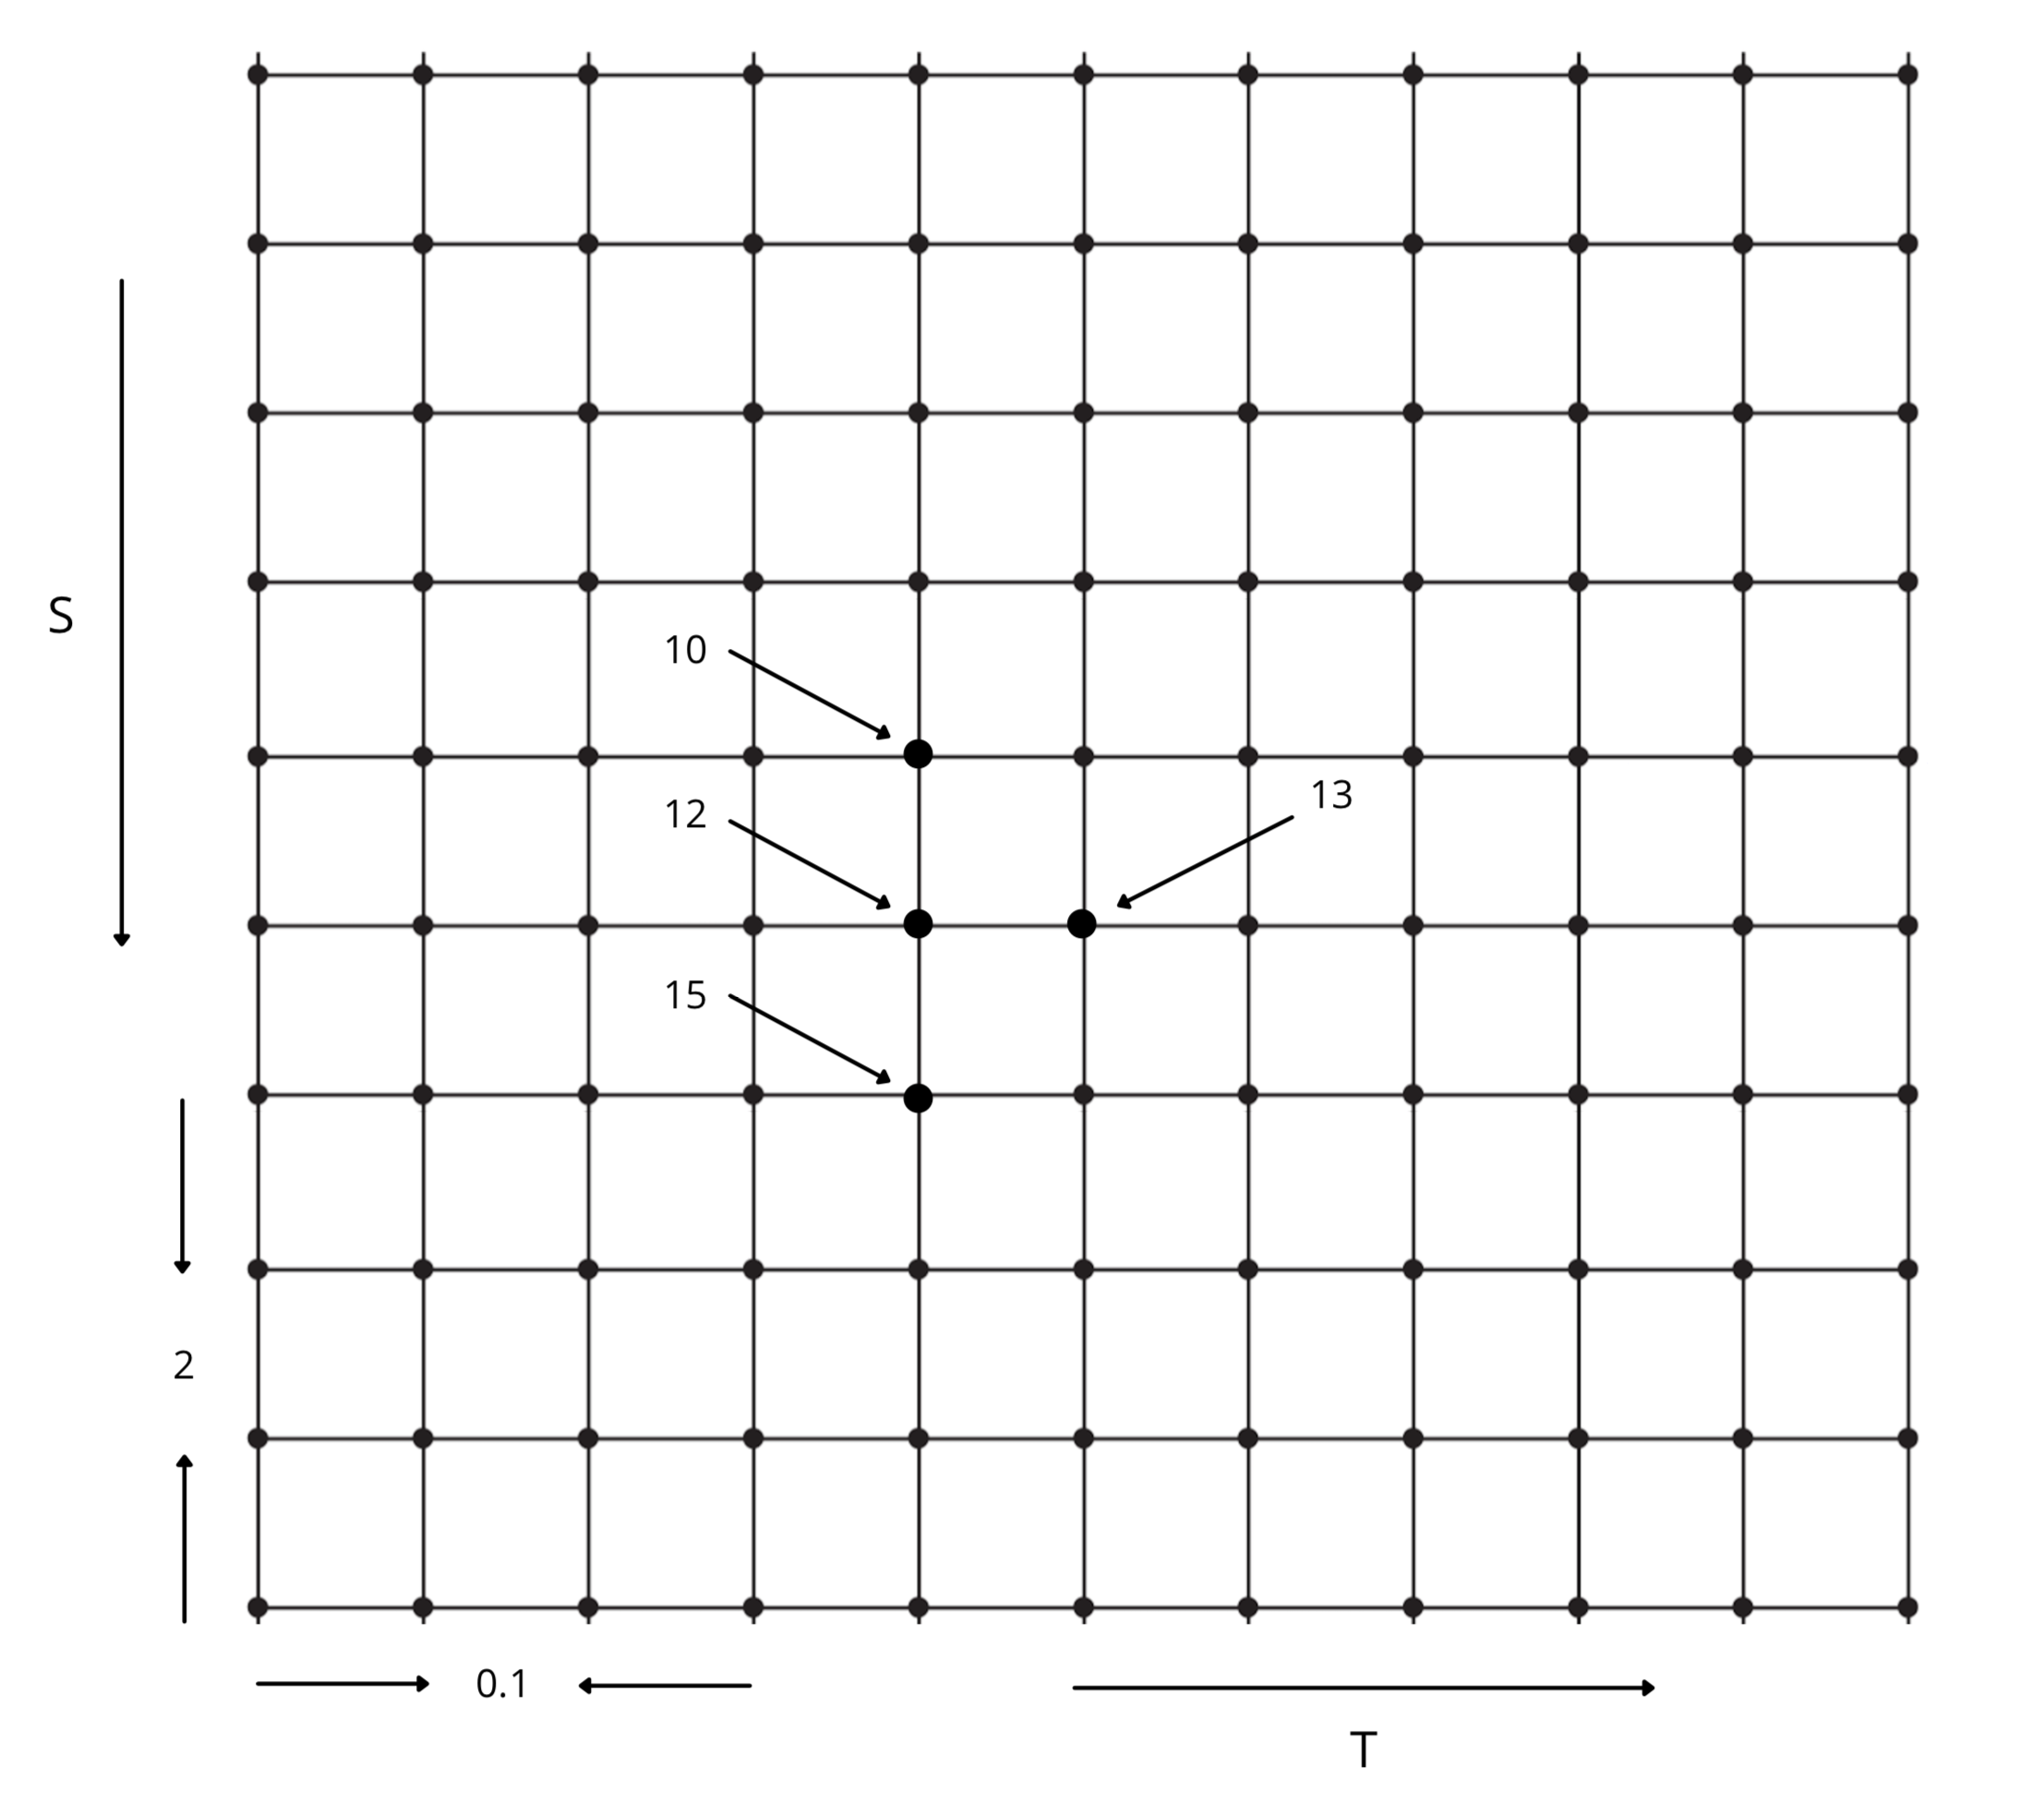

From the grid, we can estimate the

$$\Theta = \frac{12-13}{0.1} = -10$$

$$\Delta = \frac{15-10}{2 \times 2} = 1.25$$

$$\Gamma = \frac{15 - 2\times 12 + 10}{2\times 2} = 0.25$$

Black Scholes Equation is a relationship between the option value and greeks. If we know the option value at the expiration, we can step back to get the values prior to it such that $V_k^i = V_{k-1}^i - \Theta \times dt$. This approach is called Explicit Finite Difference Method because the relationship between the option values at time step $k$ is a simple function of the option values at time step $k-1$.



## 4 Option Pricing Techniques
As with other option pricing techniques Explicit Finite Difference methods are used to price options using what is essentially a three step process.

- Step 1: Generate the grid by specifying grid points.
- Step 2: Specify the final or initial conditions.
- Step 3: Use boundary conditions to calculate option values and step back down the grid to fill it.

**European Option**

To price an option, we generate a finite grid of a specified asset and time steps for a given maturity. Next, we specify the initial and boundary conditions to calculate payoff when S and T equals zero. We then step back to fill the grid with newer values derived from the earlier values.

**Specify Parameters**,   $V_i^k$

For the stability condition,

$$\delta t < \frac{1}{\sigma^2 N^2}$$

In [2]:
# Specify the parameters for FDM 
T    = 1                              # time to maturity in years
E    = 100                            # strike price
r    = .05                            # riskfree rate
vol  = .20                            # volatility
Flag = 1                              # Flag = 1 for call, -1 for puts
EType = 100                           # EType = 1 for american, 0 for european
NAS  = 20                             # number of asset steps                      'i'

ds   = 2* E / NAS                     # asset step size
dt   = (0.9/vol**2/NAS**2)            # time step size, for stability    Stability Condition derived from Fourier

NTS  = int(T / dt) + 1                # number of time steps                       'k'
dt   = T / NTS                        # time step size [Expiration as int # of time steps away]

## 4.1 Generate Grid
Build the grid with the above input parameters

In [3]:
# Create asset steps i*ds
s = np.arange(0, (NAS+1)*ds,ds)
print(s)

print('-'*50)
# Create time steps k*dt
t = T-np.arange(NTS*dt,-dt,-dt)
print(np.around(t, 3))

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]
--------------------------------------------------
[0.    0.056 0.111 0.167 0.222 0.278 0.333 0.389 0.444 0.5   0.556 0.611
 0.667 0.722 0.778 0.833 0.889 0.944 1.   ]


In [4]:
# Verify the steps size
s.shape, t.shape

((21,), (19,))

In [5]:
# Initialize the grid with zeros
grid = np.zeros((len(s),len(t)))

# Subsume the grid points into a dataframe
# with asset price as index and time steps as columns
grid = pd.DataFrame(grid, index=s, columns=np.around(t,3))
grid

0.000  0.056  0.111  0.167  0.222  0.278  0.333  0.389  0.444  0.500  \
0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
30.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
40.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
60.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
70.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
80.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
90.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
110.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
120.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
130.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
140.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
150.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
160.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
170.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
180.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
190.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
200.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       0.556  0.611  0.667  0.722  0.778  0.833  0.889  0.944  1.000  
0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
10.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
20.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
30.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
40.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
50.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
60.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
70.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
80.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
90.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
110.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
120.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
130.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
140.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
150.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
160.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
170.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
180.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
190.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
200.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0

## 4.2 Specify payoff at expiration
Specify final condition and payoffs

$$V_i^0 = max(i\delta s - E , 0)$$

In [6]:
# Set Final or Initial condition at Expiration
# for the '0th' column only, let's have a look
if Flag == 1:    # for call option
    grid.iloc[:,0] = np.maximum(s - E, 0)
else:    # for put option
    grid.iloc[:,0] = np.maximum(E - s, 0)
    
# Verify the grid
grid

0.000  0.056  0.111  0.167  0.222  0.278  0.333  0.389  0.444  0.500  \
0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
30.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
40.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
60.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
70.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
80.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
90.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
110.0   10.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
120.0   20.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
130.0   30.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
140.0   40.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
150.0   50.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
160.0   60.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
170.0   70.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
180.0   80.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
190.0   90.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
200.0  100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       0.556  0.611  0.667  0.722  0.778  0.833  0.889  0.944  1.000  
0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
10.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
20.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
30.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
40.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
50.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
60.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
70.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
80.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
90.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
110.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
120.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
130.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
140.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
150.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
160.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
170.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
180.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
190.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
200.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0

In [7]:
# Store payoff for early exercise
p = []
for j in np.arange(0, NAS+1):
    p.append(grid.iloc[j,0])

p

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.0,
 20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0]

## 4.3 Fill the Grid
Specify boundary condition at $S = 0$

$$V_0^k = (1-r\delta t) V_0^{k-1}$$

Specify boundary condition at $S = \infty$

$$V_i^k = 2V_{i-1}^k - V_{i-2}^k$$

---
We backward induct, 

$$V_k^i = V_{k-1}^i - \Theta \times dt$$

$\Theta$ is getting from the Black-Schole fomula,

$$\Theta + \frac{1}{2}\sigma^2 S^2 \Gamma  + rS\Delta - r V = 0$$

In [8]:
# k is counter
for k in range(1, len(t)):
    for i in range(1,len(s)-1):
        delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
        gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
        # theta from BS fomula
        theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])
        # backward induction
        grid.iloc[i,k] = grid.iloc[i,k-1] - (theta*dt)
    
    # Set boundary condition at S = 0
    grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt) # ds = rsdt + sigma*sdx, s= 0, ds = 0 
    
    # Set boundary condition at S = infinity  # gamma = 0, so you can linearly extract
    grid.iloc[len(s)-1,k] = 2*grid.iloc[len(s)-2,k] - grid.iloc[len(s)-3,k]

    if EType == 1:
        for i in range(0,len(s)):
            grid.iloc[i,k] = maximum(grid.iloc[i,k], p[i])

# Round grid values to 2 decimals
grid = np.around(grid,3)

# Output the option values
grid.iloc[0:15,:]

0.000   0.056   0.111   0.167   0.222   0.278   0.333   0.389   0.444  \
0.0      0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
10.0     0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
20.0     0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
30.0     0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
40.0     0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
50.0     0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
60.0     0.0   0.000   0.000   0.000   0.000   0.000   0.000   0.001   0.001   
70.0     0.0   0.000   0.000   0.000   0.001   0.003   0.008   0.016   0.028   
80.0     0.0   0.000   0.000   0.011   0.037   0.080   0.141   0.218   0.310   
90.0     0.0   0.000   0.128   0.336   0.592   0.878   1.182   1.495   1.812   
100.0    0.0   1.250   2.253   3.093   3.819   4.466   5.054   5.599   6.109   
110.0   10.0  10.278  10.671  11.118  11.587  12.063  12.535  13.000  13.455   
120.0   20.0  20.278  20.555  20.848  21.159  21.486  21.826  22.174  22.529   
130.0   30.0  30.278  30.555  30.831  31.109  31.392  31.680  31.973  32.272   
140.0   40.0  40.278  40.555  40.831  41.106  41.382  41.658  41.935  42.213   

        0.500   0.556   0.611   0.667   0.722   0.778   0.833   0.889   0.944  \
0.0     0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
10.0    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
20.0    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
30.0    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
40.0    0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
50.0    0.000   0.000   0.000   0.001   0.001   0.001   0.002   0.003   0.004   
60.0    0.003   0.004   0.007   0.011   0.016   0.023   0.031   0.041   0.053   
70.0    0.045   0.067   0.094   0.126   0.164   0.207   0.255   0.308   0.367   
80.0    0.416   0.534   0.662   0.799   0.944   1.096   1.253   1.416   1.583   
90.0    2.131   2.450   2.766   3.080   3.392   3.700   4.004   4.306   4.604   
100.0   6.593   7.054   7.497   7.925   8.339   8.741   9.133   9.515   9.889   
110.0  13.901  14.337  14.763  15.180  15.589  15.990  16.383  16.770  17.149   
120.0  22.887  23.247  23.607  23.967  24.326  24.683  25.038  25.391  25.741   
130.0  32.575  32.882  33.192  33.504  33.819  34.134  34.451  34.768  35.085   
140.0  42.494  42.777  43.061  43.348  43.636  43.926  44.217  44.509  44.802   

        1.000  
0.0     0.000  
10.0    0.000  
20.0    0.000  
30.0    0.000  
40.0    0.000  
50.0    0.006  
60.0    0.066  
70.0    0.430  
80.0    1.754  
90.0    4.899  
100.0  10.255  
110.0  17.523  
120.0  26.089  
130.0  35.402  
140.0  45.095

In [9]:
# Print out stock, payoff and option value
data = {
    "Stock": s,
    "Payoff": p,
    "Option": grid.iloc[:,-1]
}

option_value_2D = pd.DataFrame(data)
option_value_2D  # print(option_value_2D.to_string(index=False))

Stock  Payoff   Option
0.0      0.0     0.0    0.000
10.0    10.0     0.0    0.000
20.0    20.0     0.0    0.000
30.0    30.0     0.0    0.000
40.0    40.0     0.0    0.000
50.0    50.0     0.0    0.006
60.0    60.0     0.0    0.066
70.0    70.0     0.0    0.430
80.0    80.0     0.0    1.754
90.0    90.0     0.0    4.899
100.0  100.0     0.0   10.255
110.0  110.0    10.0   17.523
120.0  120.0    20.0   26.089
130.0  130.0    30.0   35.402
140.0  140.0    40.0   45.095
150.0  150.0    50.0   54.966
160.0  160.0    60.0   64.914
170.0  170.0    70.0   74.895
180.0  180.0    80.0   84.887
190.0  190.0    90.0   94.883
200.0  200.0   100.0  104.880

In [10]:
# Plot option value and payoff
option_value_2D[['Payoff', 'Option']].iplot(title='Payoff & Option Value')

## 5 User Defined Function
Let’s subsume above grid calculation into a function for ease of use. All we have to do is to combine
the above code blocks into a single function.

In [11]:
def fdm_option(Strike, Volatility, Rate, TTM, NAS, Flag=-1, EType=0):
    # NAS is the # of step from the Right-side to our target, the more NAS, the more accurate the FDM result.
    
    # Specify Flag as 1 for calls and -1 for puts
    # Specify EType as 1 for early exercise and 0 for european
    
    ds = 2*Strike/NAS                   # asset step size
    dt = 0.9/Volatility**2/NAS**2       # for stability
    
    NTS = int(TTM / dt) + 1             # time step size, alternatively use fixed size 10 on stability issue 
    dt = TTM/NTS                        # time step
    
    s = np.arange(0,(NAS+1)*ds,ds)
    t = TTM-np.arange(NTS*dt,-dt,-dt)
    
    # Initialize the grid with zeros
    grid = np.zeros((len(s),len(t)))
    grid = pd.DataFrame(grid, index=s, columns=np.around(t,2))
    
    # Set boundary condition at Expiration
    grid.iloc[:,0] = abs(np.maximum(Flag * (s - Strike), 0))
        
    for k in range(1, len(t)):
        for i in range(1,len(s)-1):
            delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
            gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
            theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])

            grid.iloc[i,k] = grid.iloc[i,k-1] - dt*theta
    
        # Set boundary condition at S = 0
        grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt)

        # Set boundary condition at S = infinity
        grid.iloc[len(s)-1,k] = abs(2*(grid.iloc[len(s)-2,k]) - grid.iloc[len(s)-3,k])

        # Check for early exercise
        if EType==1:
            for i in range(0,len(s)):
                grid.iloc[i,k] = np.maximum(grid.iloc[i,k], p[i])

    # round grid values to 4 decimals
    return np.around(grid,2)

In [12]:
# Call the function to price options
fdm_grid = fdm_option(100,0.2,0.05,1,20,Flag=-1, EType=1)
fdm_grid

0.00    0.06    0.11    0.17    0.22    0.28    0.33    0.39    0.44  \
0.0    100.0   99.72   99.45   99.17   98.89   98.62   98.34   98.07   97.80   
10.0    90.0   89.72   89.45   89.17   88.89   88.62   88.34   88.07   87.80   
20.0    80.0   79.72   79.45   79.17   78.89   78.62   78.34   78.07   77.80   
30.0    70.0   69.72   69.45   69.17   68.89   68.62   68.34   68.07   67.80   
40.0    60.0   59.72   59.45   59.17   58.89   58.62   58.34   58.07   57.80   
50.0    50.0   49.72   49.45   49.17   48.89   48.62   48.34   48.07   47.80   
60.0    40.0   39.72   39.45   39.17   38.89   38.62   38.35   38.07   37.80   
70.0    30.0   29.72   29.45   29.17   28.89   28.62   28.36   28.10   27.84   
80.0    20.0   19.72   19.45   19.18   18.94   18.74   18.57   18.43   18.33   
90.0    10.0    9.72    9.57    9.63    9.82   10.09   10.40   10.75   11.11   
100.0    0.0    0.97    2.95    4.52    5.81    6.90    7.87    8.72    9.51   
110.0    0.0   10.00   10.39   10.96   11.60   12.27   12.94   13.61   14.25   
120.0    0.0   20.00   20.28   20.57   20.90   21.26   21.66   22.07   22.50   
130.0    0.0   30.00   30.28   30.55   30.83   31.12   31.42   31.72   32.04   
140.0    0.0   40.00   40.28   40.55   40.83   41.11   41.38   41.66   41.95   
150.0    0.0   50.00   50.28   50.55   50.83   51.11   51.38   51.66   51.93   
160.0    0.0   60.00   60.28   60.55   60.83   61.11   61.38   61.66   61.93   
170.0    0.0   70.00   70.28   70.55   70.83   71.11   71.38   71.66   71.93   
180.0    0.0   80.00   80.28   80.55   80.83   81.11   81.38   81.66   81.93   
190.0    0.0   90.00   90.28   90.55   90.83   91.11   91.38   91.66   91.93   
200.0    0.0  100.00  100.28  100.55  100.83  101.11  101.38  101.66  101.93   

         0.50    0.56    0.61    0.67    0.72    0.78    0.83    0.89    0.94  \
0.0     97.53   97.26   96.99   96.72   96.45   96.18   95.91   95.65   95.38   
10.0    87.53   87.26   86.99   86.72   86.45   86.18   85.91   85.65   85.38   
20.0    77.53   77.26   76.99   76.72   76.45   76.18   75.91   75.65   75.38   
30.0    67.53   67.26   66.99   66.72   66.45   66.18   65.91   65.65   65.38   
40.0    57.53   57.26   56.99   56.72   56.45   56.18   55.91   55.65   55.38   
50.0    47.53   47.26   46.99   46.72   46.45   46.18   45.92   45.65   45.39   
60.0    37.53   37.26   37.00   36.74   36.48   36.22   35.97   35.72   35.47   
70.0    27.60   27.37   27.15   26.94   26.74   26.55   26.38   26.21   26.06   
80.0    18.25   18.21   18.18   18.18   18.19   18.22   18.26   18.32   18.38   
90.0    11.47   11.84   12.20   12.56   12.92   13.27   13.62   13.96   14.29   
100.0   10.23   10.90   11.54   12.14   12.71   13.26   13.79   14.29   14.79   
110.0   14.88   15.49   16.09   16.66   17.22   17.76   18.29   18.80   19.30   
120.0   22.94   23.39   23.84   24.29   24.74   25.19   25.64   26.08   26.51   
130.0   32.37   32.71   33.06   33.41   33.77   34.13   34.50   34.87   35.23   
140.0   42.23   42.53   42.82   43.13   43.43   43.74   44.06   44.37   44.69   
150.0   52.21   52.48   52.76   53.04   53.32   53.61   53.90   54.19   54.48   
160.0   62.20   62.47   62.75   63.02   63.29   63.57   63.84   64.12   64.40   
170.0   72.20   72.47   72.74   73.01   73.29   73.56   73.83   74.10   74.37   
180.0   82.20   82.47   82.74   83.01   83.28   83.55   83.82   84.09   84.36   
190.0   92.20   92.47   92.74   93.01   93.28   93.55   93.82   94.09   94.35   
200.0  102.20  102.47  102.74  103.01  103.28  103.55  103.82  104.08  104.35   

         1.00  
0.0     95.12  
10.0    85.12  
20.0    75.12  
30.0    65.12  
40.0    55.12  
50.0    45.13  
60.0    35.24  
70.0    25.91  
80.0    18.45  
90.0    14.62  
100.0   15.26  
110.0   19.79  
120.0   26.95  
130.0   35.60  
140.0   45.01  
150.0   54.77  
160.0   64.67  
170.0   74.64  
180.0   84.62  
190.0   94.62  
200.0  104.61

## 5.1 Option Values
Let's now get the value of European call and put option for K=100, Volatility=20%, Rate=5%, T=1 and NAS=60.

In [13]:
# Output the option values
Euro_call = fdm_option(100,0.2,0.05,1,60,Flag=1).loc[100,1]
Euro_put = fdm_option(100,0.2,0.05,1,60,Flag=-1).loc[100,1]

# Print the values
print(f"European Call Option Value is {Euro_call:0.4f}")
print(f"European Put Option Value is {Euro_put:0.4f}")

European Call Option Value is 10.4300
European Put Option Value is 5.5500


## 5.2 Visualize the payoff

In [14]:
# Plot Option Payoff
# Axis titles are not rendered correctly on the graph. This is a bug in cufflinks
fig = fdm_grid.iplot(kind = 'surface', title='Option values by Explicit FDM', xTitle='Spot', yTitle='Maturiy', zTitle='Option Value', asFigure=True)
fig.show()

In [ ]:
# Save the figure - you might have to install kaleido for earlier version of plotly
# !pip install -U kaleido

# Save as portable network graphics
fig.write_image("images/fdm_option.png")

## 6 Bilinear Interpolation

As the grid is not continuous, Bilinear Interpolation is a method to calculate the value of option that is not straightly on the point of the grid. 

We have generated the grid and filled it with the possible option values. However, if we have to estimate option value or its derivatives on the mesh points, how can we estimate the value at points in between? The simplest way is to do a two-dimensional interpolation method called Bilinear Interpolation.

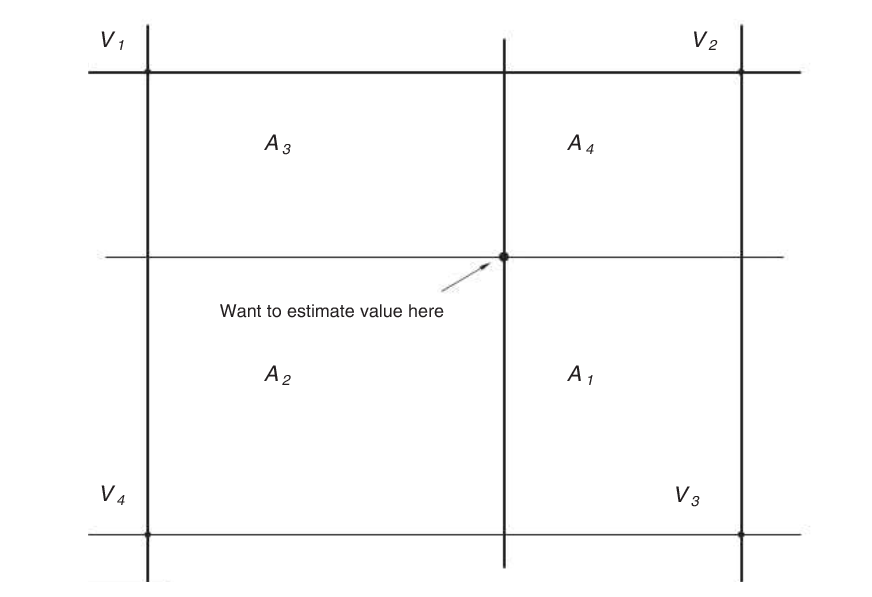

The option value can be estimated using the values from the nearest neighbouring values. Assume $V_1, V_2, V_3, V_4$
 are the option values from the nearest neighbour and $A_1, A_2, A_3, A_4$ are the areas of the rectanges made by the four corners and the interior points, we can approximate the option value at the interior points as,
 
 $$\frac{\sum_1^4 A_i V_i}{\sum_1^4 A_i}$$

In [ ]:
def bilinear_interpolation(asset_price, ttm, df):

    # Find relevant rows and columns
    # asset_price, and ttm are the location, or (x-axis, y-axis). 
    # We aim the find four V_i^k that are most close to that loc
    col1 = df.columns[df.columns < ttm][-1] # find the time location that is most left close to the 'ttm'
    col2 = df.columns[df.columns >= ttm][0] # most right close to the 'ttm'
    row1 = df.index[df.index < asset_price,][-1]
    row2 = df.index[df.index >= asset_price,][0]
   
    # Define points and areas
    # option values from the nearest neighbour 
    V = [df.loc[row1, col1], df.loc[row1, col2],
           df.loc[row2, col2], df.loc[row2, col1]]
    # areas of the rectanges made by the four corners and the interior points,      
    A = [(row2 - asset_price) * (col2 - ttm),
           (row2 - asset_price) * (ttm - col1),
           (asset_price - row1) * (ttm - col1),
           (asset_price - row1) * (col2 - ttm)]
   
    # Interpolate values
    return sum(np.array(V)*np.array(A))/sum(np.array(A))

In [ ]:
# Option value, approximated
print(bilinear_interpolation(105, 0.3, grid))

In [ ]:
# Verify rows and columns
# col1 = grid.columns[grid.columns < 0.3][-1]
# col2 = grid.columns[grid.columns >= 0.3][0]
# row1 = grid.index[grid.index < 110][-1]
# row2 = grid.index[grid.index >= 110][0]

# Nearest neighbours grid points
# [row1,col1], [row1, col2], [row2, col2], [row2, col1]

# Get option values
# V = [grid.loc[row1,col1], grid.loc[row1,col2], grid.loc[row2, col2], grid.loc[row2, col1]]

# Areas of the rectangle made by four corners and interior points
# A = [(row2-105) * (col2-0.3),
#      (row2-105) * (0.3-col1),
#      (105-row1) * (0.3-col1),
#      (105-row1) * (col2-0.3)]

# Option value in mesh points, approximated
# sum(array(V)*array(A))/sum(array(A))

## 7 Convergence Analysis
Let's now Compare option pricing for various asset steps (NAS) with black scholes price.

In [ ]:
# Iterate over asset steps (NAS)
nas_list = [10,20,30,40,50,60]
fdmoption = []
for i in nas_list:
    fdmoption.append(fdm_grid(100,0.2,0.05,1,i).loc[100,1]) 
    # .loc[100,1] specify that Spot price =100, date to expire = 1
fdmoption

In [ ]:
from src.blackscholes import BS

# Instantiate black scholes object
option = BS(100,100,0.05,1,0.20)
bsoption = round(option.callPrice,2)
bsoption = bsoption.repeat(len(nas_list))

# Range of option price
bsoption

In [ ]:
# Subsume into dataframe
df = pd.DataFrame(list(zip(bsoption,fdmoption)), columns=['BS', 'FDM'], index=nas_list)
df['dev'] = df['FDM'] - df['BS']

# Output
print("BS - FDM Convergence over NAS")
print('We can find from the Table, the value of option goes close to the B-S value as NAS increasing')
df